# Rolls Royce Holdings London Stock Market Dataset

Rolls-Royce Holdings PLC is a United Kingdom-based engineering company. The Company is focused on power and propulsion systems. Its segments include Civil Aerospace, which is engaged in the development, manufacture, marketing and sales of commercial aero engines and aftermarket services; Defence Aerospace, which is engaged in the development, manufacture, marketing and sales of military aero engines and aftermarket services, and caters to sectors, including combat aircraft, trainer aircraft and helicopters; Power Systems, which is engaged in the development, manufacture, marketing and sales of reciprocating engines and power systems. Power Systems provides power solutions and complete life-cycle support under product and solution brand MTU systems.

This Dataset is a Stock Market Dataset Dated 1st January, 2016 to the current day (6th January 2021).
Machine Learning Algorithm XGBoosting has been applied as a Regressor problem in order to forecast what could be the Stock Market Closing Price in a longer run.

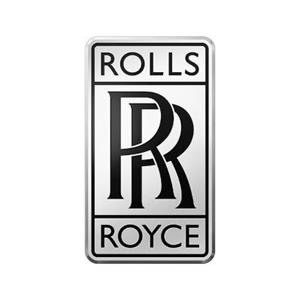

# Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Rolls Royce Stock.csv", encoding="unicode escape")
df.head()

,Date,Price,Open,High,Low,Volume(M),Chg%
0,1/4/2016,560,565.5,569.2,558,4.25M,-2.61%
1,1/5/2016,564.5,563.5,569.2,556,3.97M,0.80%
2,1/6/2016,560,564,568,554.8,4.07M,-0.80%
3,1/7/2016,546,544,548.5,541,7.60M,-2.50%
4,1/8/2016,559.5,550,564,547,11.41M,2.47%


# Cleaning the Data

In [3]:
df["Volume(M)"] = df["Volume(M)"].replace({"M": ""}, regex=True)

In [4]:
df.head()

,Date,Price,Open,High,Low,Volume(M),Chg%
0,1/4/2016,560,565.5,569.2,558,4.25,-2.61%
1,1/5/2016,564.5,563.5,569.2,556,3.97,0.80%
2,1/6/2016,560,564,568,554.8,4.07,-0.80%
3,1/7/2016,546,544,548.5,541,7.60,-2.50%
4,1/8/2016,559.5,550,564,547,11.41,2.47%


In [5]:
df = df.drop("Chg%", axis = 1)

In [6]:
df["Price"] = df["Price"].replace({",":""}, regex = True)
df["Open"] = df["Open"].replace({",":""}, regex = True)
df["High"] = df["High"].replace({",":""}, regex = True)
df["Low"] = df["Low"].replace({",":""}, regex = True)

In [7]:
df["Price"] = df["Price"].replace({"K":""}, regex = True)
df["Open"] = df["Open"].replace({"K":""}, regex = True)
df["High"] = df["High"].replace({"K":""}, regex = True)
df["Low"] = df["Low"].replace({"K":""}, regex = True)
df["Volume(M)"] = df["Volume(M)"].replace({"K":""}, regex = True)

# Creating Percentage Columns to understand the Change

In [8]:
df["Price"] = df["Price"].astype(dtype="float")
df["Open"] = df["Open"].astype(dtype="float")
df["High"] = df["High"].astype(dtype="float")
df["Low"] = df["Low"].astype(dtype="float")

In [9]:
df["HL Perc"] = ((df["High"] - df["Low"])/df["Low"]) * 100
df["CO Perc"] = ((df["Price"] - df["Open"])/df["Open"]) * 100

In [10]:
df.head()

,Date,Price,Open,High,Low,Volume(M),HL Perc,CO Perc
0,1/4/2016,560.0,565.5,569.2,558.0,4.25,2.007168,-0.972591
1,1/5/2016,564.5,563.5,569.2,556.0,3.97,2.374101,0.177462
2,1/6/2016,560.0,564.0,568.0,554.8,4.07,2.379236,-0.709220
3,1/7/2016,546.0,544.0,548.5,541.0,7.60,1.386322,0.367647
4,1/8/2016,559.5,550.0,564.0,547.0,11.41,3.107861,1.727273


In [11]:
dates = np.array(df["Date"])

In [12]:
dates

array(['1/4/2016', '1/5/2016', '1/6/2016', ..., '12/31/2020', '1/4/2021',
       '1/5/2021'], dtype=object)

# Picking up latest dates inorder to Forecast

In [13]:
dates_predict = dates[-80:]
dates = dates[:-80]

In [14]:
df.head()

,Date,Price,Open,High,Low,Volume(M),HL Perc,CO Perc
0,1/4/2016,560.0,565.5,569.2,558.0,4.25,2.007168,-0.972591
1,1/5/2016,564.5,563.5,569.2,556.0,3.97,2.374101,0.177462
2,1/6/2016,560.0,564.0,568.0,554.8,4.07,2.379236,-0.709220
3,1/7/2016,546.0,544.0,548.5,541.0,7.60,1.386322,0.367647
4,1/8/2016,559.5,550.0,564.0,547.0,11.41,3.107861,1.727273


In [15]:
df["Price Next Month"] = np.array(df["Price"].shift(-80))

In [16]:
df.head()

,Date,Price,Open,High,Low,Volume(M),HL Perc,CO Perc,Price Next Month
0,1/4/2016,560.0,565.5,569.2,558.0,4.25,2.007168,-0.972591,665.9
1,1/5/2016,564.5,563.5,569.2,556.0,3.97,2.374101,0.177462,694.0
2,1/6/2016,560.0,564.0,568.0,554.8,4.07,2.379236,-0.709220,669.5
3,1/7/2016,546.0,544.0,548.5,541.0,7.60,1.386322,0.367647,642.0
4,1/8/2016,559.5,550.0,564.0,547.0,11.41,3.107861,1.727273,645.0


In [17]:
df = df[["HL Perc","CO Perc","Volume(M)","Price Next Month","Price"]]

In [18]:
X = np.array(df.drop(["Price Next Month"], 1))

In [19]:
df.dropna(inplace = True)

In [20]:
y = np.array(df["Price Next Month"])

# Pre Processing & Training and Splitting the Data

In [21]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [22]:
X.shape

(1267, 4)

In [23]:
y.shape

(1187,)

In [24]:
X_predict = X[-80:]
X = X[:-80]

In [25]:
X.shape

(1187, 4)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# XGBoosting Regressor Algorithm Implementation

In [27]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [28]:
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
conf = model.score(X_train, y_train)
conf

0.9991098277084919

In [30]:
predictions = model.predict(X_predict)
predictions

array([114.287994, 103.11488 , 128.57355 ,  97.796234, 114.76289 ,
       100.53497 , 102.92692 ,  99.81825 , 119.42454 , 115.06355 ,
       110.91631 , 122.20405 , 115.06355 , 104.49768 ,  94.993904,
       118.53433 , 103.12957 ,  78.91398 ,  85.8593  ,  78.91398 ,
        76.83738 ,  90.74692 ,  97.796234, 116.13834 , 112.639046,
        95.15091 , 107.127304,  95.57833 , 109.30034 , 111.1928  ,
       112.32782 , 110.42184 , 108.92237 ,  66.72408 , 102.39995 ,
       116.67657 , 100.447395,  91.08453 ,  89.89166 ,  96.39488 ,
        99.24117 ,  51.15566 ,  76.50159 ,  71.37317 ,  57.12358 ,
        45.526897,  46.678646,  84.89418 ,  73.908936,  82.55688 ,
        73.95914 ,  75.90261 ,  49.97284 ,  56.55096 ,  77.01693 ,
        77.780594,  80.16817 ,  66.7299  ,  67.19212 ,  48.880447,
        68.18252 ,  84.27954 ,  79.984604, 101.26023 ,  79.9342  ,
        58.19994 ,  75.9773  ,  76.0864  ,  69.84239 ,  78.46875 ,
        78.30055 ,  67.69857 ,  82.605   ,  88.18692 ,  80.454

In [31]:
actual = pd.DataFrame(dates, columns=["Dates"])
actual["Closing Price"] = df["Price"]
actual["Forecast"] = np.nan
actual.set_index("Dates", inplace= True)
forecast = pd.DataFrame(dates_predict, columns = ["Dates"])
forecast["Closing Price"] = np.nan
forecast["Forecast"] = predictions
forecast.set_index("Dates", inplace = True)
var = [actual, forecast]
Forecast_output = pd.concat(var)

# Plotting the Current Closing Prices and the Forecast

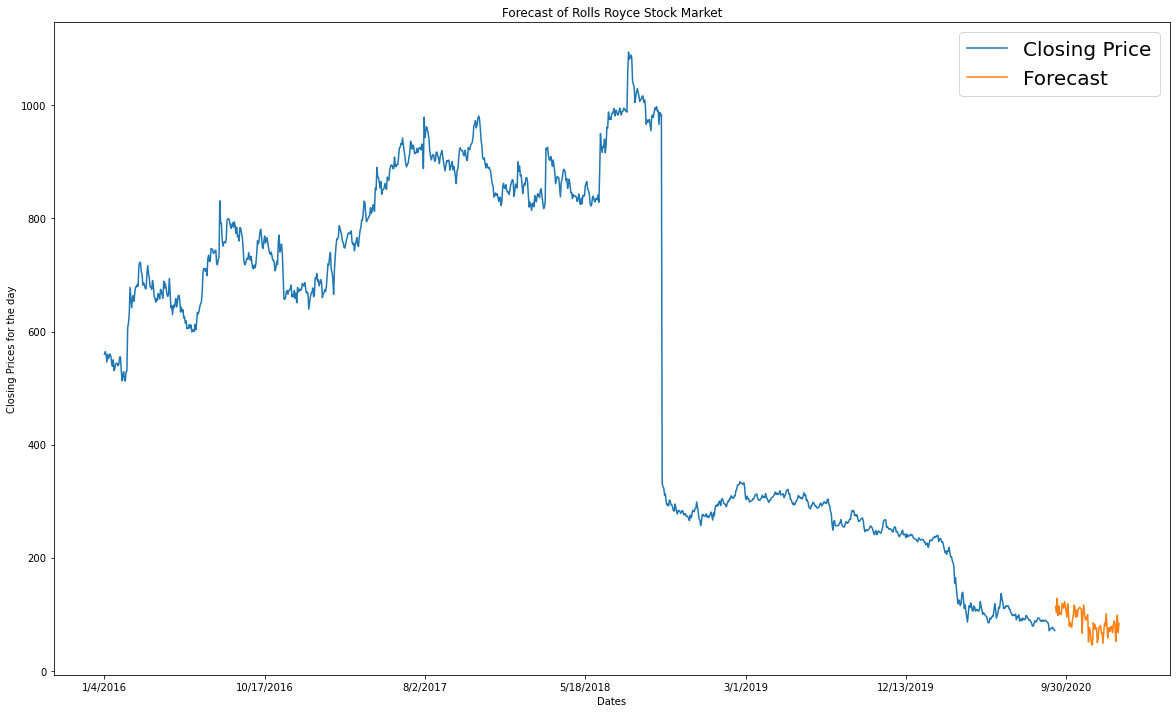

In [32]:
Forecast_output.plot(figsize= (20,12), title = "Forecast of Rolls Royce Stock Market", linewidth = 1.5)
plt.ylabel("Closing Prices for the day")
plt.xlabel("Dates")
plt.legend(loc = 1, prop = {"size" : 20})